### Developer Student Club (DSC) - Beginner Machine Learning Track 

### Classification
Is a problem of identifying which categories an observation belongs to based on the training data.

Examples of Classification include:
* Detect *Spam* and *Non-Span* Email
* Detect cancer or not

### Logistic Regression
Is a binary classifier based on [Sigmoid Function](https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf) to compute the probability for which categories an observation belongs to.
![alt text](https://www.researchgate.net/profile/Knut_Kvaal/publication/239269767/figure/fig2/AS:643520205430784@1530438581076/An-illustration-of-the-signal-processing-in-a-sigmoid-function.png)

* Probability *f(x)* ranges from minimum 0 to maximum 1 that the closer f(x) to 1, the more likely the observation is in one category; and the closer f(x) to 0, the less likely the observation is in that cateogry.
* E.g. Logistic Regression to detect *Spam* and *Non-Span* Email with *Spam email* when f(x) = 1 and *Non-Spam email* when f(x) = 0. The f(x) = 0.9 means that there is 90% of likeliness that the email is Spam. 
* Logistic Regression can be used for both **Binary Classification** and **Multi-Classification**

### Logistic Regression for identifying Iris flower types. 
### [Iris Flower Dataset](https://www.kaggle.com/arshid/iris-flower-dataset)
* The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The **use of multiple measurements** in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to **quantify the morphologic variation of Iris flowers of three related species**. 
* The data set consists of **50 samples from each of three species** of Iris (Iris Setosa, Iris virginica, and Iris versicolor). **Four features** were measured from each sample: **the length and the width of the sepals and petals,** in centimeters.

![alt text](https://miro.medium.com/max/2006/1*8BQGOzI2cgNZxiqnjZPfMg.jpeg)

#### **Goal:** identify which specifici species of Iris the flower observation falls under

#### Import dependencies

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

#### Load data

In [0]:
#load iris data
iris = load_iris()
data = iris.data
labels = iris.target

In [0]:
#parse data and labels into pandas.DataFrames for easy data manipulation
#df - DataFrame
df = pd.DataFrame(data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df['species_id'] = labels

#add species_name for visualization
species_map = {0 : 'sentosa', 1 : 'versicolor', 2 : 'virginica'}
df['species_name'] = df['species_id'].map(species_map)

#### Explanatory Data Analysis

##### Inspect first 5 rows of Iris dataset

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,5.1,3.5,1.4,0.2,0,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa


##### Inspect statistics of Iris dataset

In [57]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


##### Check missing values

In [18]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species_id      False
species_name    False
dtype: bool

##### Check Iris types

In [91]:
print(df['species_name'].unique())

['sentosa' 'versicolor' 'virginica']


#### Inspecting by visualization

##### Inspecting the balance of labels

<function matplotlib.pyplot.show>

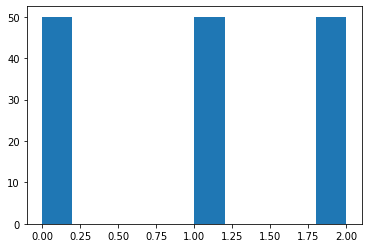

In [92]:
plt.hist(df['species_id'])
plt.show

##### Inspecting **Septal** feature by Length and Width

<function matplotlib.pyplot.show>

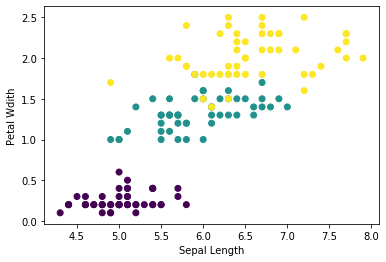

In [93]:
# By length
plt.scatter(df['sepal_length'], df['petal_width'], c = df['species_id'])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Wdith')
plt.show

<function matplotlib.pyplot.show>

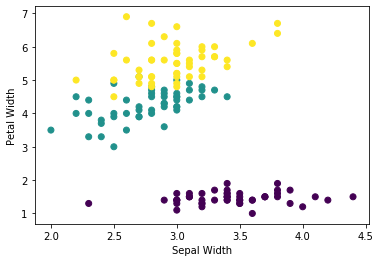

In [94]:
# By width
plt.scatter(df['sepal_width'], df['petal_length'], c = df['species_id'])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.show

##### Classifying Sentosa versus Versicolor

In [95]:
df = df[df['species_name'].isin(['sentosa', 'versicolor'])]
print(df['species_name'].unique())

['sentosa' 'versicolor']


#### Split dataset into Train and Test subsets: *80% for training and 20% for testing*

In [0]:
from sklearn.model_selection import train_test_split
features = df.drop(['species_id', 'species_name'], axis = "columns") #drop columns
labels = df['species_id']
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, shuffle = True, random_state = 10)

#### Build **Logistic Regression** model

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
#create an instance of LogisticRegression model with: iteration_num = 100 and verbose = 1
logit_model = LogisticRegression(max_iter = 100, verbose = 1)

#### Train **Logisitc Regression** model

In [99]:
logit_model.fit(train_features, train_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

##### Making predictions

##### Making **Train** predictions

In [0]:
train_preds = logit_model.predict(train_features)
train_pred_probabilities = logit_model.predict_proba(train_features)

In [0]:
#parse predictions to dataframe
train_predictions = pd.DataFrame(columns = ['Predictions', 'Predicted Probabilities', 'True Labels'])
train_predictions['True Labels'] = train_labels
train_predictions['Predictions'] = train_preds
train_predictions['Predicted Probabilities'] = train_pred_probabilities


In [140]:
#get coefficeints and intercepts
train_W, train_b = logit_model.coef_, logit_model.intercept_
train_W, train_b

(array([[ 0.39669002, -0.85822915,  2.17651167,  0.9312474 ]]),
 array([-6.16435819]))

In [141]:
#print predictions
train_predictions

,Predictions,Predicted Probabilities,True Labels
90,1,0.011204,1
70,1,0.003860,1
50,1,0.004499,1
44,0,0.947581,0
76,1,0.002784,1
...,...,...,...
89,1,0.022128,1
28,0,0.977821,0
64,1,0.068223,1
15,0,0.982744,0


Accuracy score: 
1.0


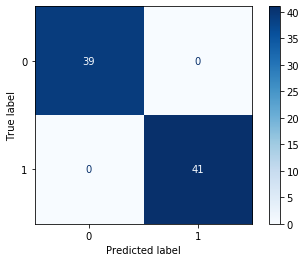

In [165]:
#test accuracy
train_confusion_matrix = confusion_matrix(train_preds, train_labels)
train_accuracy_score = accuracy_score(train_preds, train_labels)
train_disp = plot_confusion_matrix(logit_model, train_features, train_labels, cmap = plt.cm.Blues)
print("Accuracy score: ")
print(train_accuracy_score)

##### Visualizing Logistic Regression's train performance

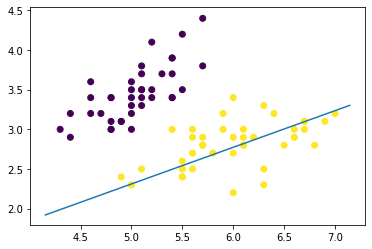

In [142]:
plt.scatter(train_features['sepal_length'], train_features['sepal_width'], c = train_labels)
ax = plt.gca()
ax.autoscale = False
xvals = np.array(ax.get_xlim())
yvals = -(xvals * train_W[0][0]) / train_W[0][1]
plt.plot(xvals, yvals)
plt.show()

##### Making **Test** predictions

In [0]:
test_preds = logit_model.predict(test_features)
test_pred_probabilities = logit_model.predict_proba(test_features)

In [0]:
#parse predictions to dataframe
test_predictions = pd.DataFrame(columns = ['Predictions', 'Predicted Probabilities', 'True Labels'])
test_predictions['True Labels'] = test_labels
test_predictions['Predictions'] = test_preds
test_predictions['Predicted Probabilities'] = test_pred_probabilities


In [144]:
#get coefficeints and intercepts
test_W, test_b = logit_model.coef_, logit_model.intercept_
test_W, test_b

(array([[ 0.39669002, -0.85822915,  2.17651167,  0.9312474 ]]),
 array([-6.16435819]))

In [138]:
#print predictions
test_predictions

,Predictions,Predicted Probabilities,True Labels
19,0,0.979334,0
14,0,0.988996,0
43,0,0.958654,0
37,0,0.984782,0
66,1,0.009252,1
3,0,0.972052,0
79,1,0.082080,1
41,0,0.962469,0
38,0,0.981619,0
68,1,0.003691,1


Accuracy score: 
1.0


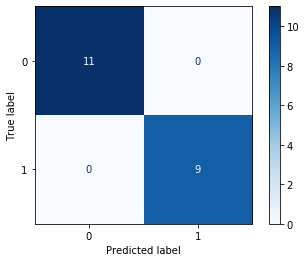

In [162]:
#test accuracy
test_confusion_matrix = confusion_matrix(test_preds, test_labels)
test_accuracy_score = accuracy_score(test_preds, test_labels)
test_disp = plot_confusion_matrix(logit_model, test_features, test_labels, cmap = plt.cm.Blues)
print("Accuracy score: ")
print(test_accuracy_score)

##### Visualizing Logisitc Regression's Test performance

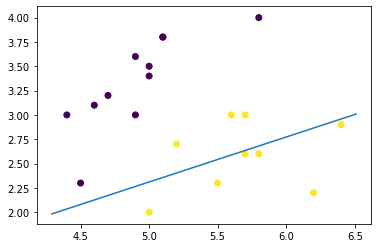

In [145]:
plt.scatter(test_features['sepal_length'], test_features['sepal_width'], c = test_labels)
ax = plt.gca()
ax.autoscale = False
xvals = np.array(ax.get_xlim())
yvals = -(xvals * test_W[0][0]) / test_W[0][1]
plt.plot(xvals, yvals)
plt.show()

### Questions?
* Does accuracy score look good? 
=> Yes
* Does the model work that well? 
=> Yes, but not really. The dataset is too small (150 records) to conclude the model's performance
* How to improve?
=> Support Vector Machine (SVM) or Decision tree

**References**
* Logistic Regression in Sci-Kit Learn, https://blog.goodaudience.com/classifying-flowers-using-logistic-regression-in-sci-kit-learn-38262416e4c6
* Sigmoid Function, https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf